In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [2]:
## Ne garder que les images non câblées

liste=[]
dossier="ModulePictures"

for fichier in os.listdir(dossier):
    if os.path.isfile(os.path.join(dossier, fichier)) and ("Reception" in os.path.basename(fichier)):
        liste.append(str(dossier + "/"+ os.path.basename(fichier)))

In [3]:
def mires(path, draw = True):

    #Lecture de l'image en noir et blanc
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"

    (height,length) = img.shape

    ## TODO : changer cette extraction à la main par quelque chose d'automatisé
    sliceparams = [(100, 400, 300, 600, 1),  
                   (-400, -100, 300, 600, 1),
                   (3800, 4200, 500, 800, 2), 
                   (100, 400, -600,-300, 1), 
                   (-400, -100, -600, -300, 1), 
                   (3800, 4200, -800, -500, 2)]

    nbmires = 1
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

    centers = []

    for (beg1, end1, beg2, end2, nbmires) in sliceparams :
        mask = img[beg1:end1, beg2:end2]

        #Blur pour réduire le bruit
        mask = cv.medianBlur(mask,5)
        #Fonction qui détecte les cercles.
        circles = cv.HoughCircles(mask,cv.HOUGH_GRADIENT,1,minDist = 100,
                                    param1=50,param2=20,minRadius=20 ,maxRadius=30)

        if circles is not None:
            circles = np.int16(np.around(circles))
            for i in circles[0,:nbmires]:
                
                centers.append((i[1]+beg1%height, i[0]+beg2%length)) #Attention ici j'inverse x,y afin de travailler en lignes/colonnes

                #Dessin des cercles
                if draw :
                    cv.circle(cimg,(i[0]+beg2%length,i[1]+beg1%height),i[2],(0,255,0),20)
                    cv.circle(cimg,(i[0]+beg2%length,i[1]+beg1%height),2,(0,0,255),3)

    if draw :
        plt.imshow(cimg)
        plt.show()

    assert len(centers) == 8, "Mires manquantes"

    slope = sum([(centers[i+4][0]-centers[i][0])/(centers[i+4][1]-centers[i][1]) for i in range(0,4)])/4

    return centers,slope

In [4]:
centresTest = mires(liste[6], False)
print(centresTest)

([(np.int16(288), np.int16(522)), (np.int16(7657), np.int16(540)), (np.int16(3912), np.int16(720)), (np.int16(4052), np.int16(722)), (np.int16(274), np.int16(7697)), (np.int16(7637), np.int16(7713)), (np.int16(3894), np.int16(7517)), (np.int16(4032), np.int16(7519))], np.float64(-0.0025825387365931178))


In [4]:
## Ne garder que les images câblées

liste_cablees=[]
dossier="ModulePictures"

for fichier in os.listdir(dossier):
    if os.path.isfile(os.path.join(dossier, fichier)) and ("AfterBonding" in os.path.basename(fichier)):
        liste_cablees.append(str(dossier + "/"+ os.path.basename(fichier)))


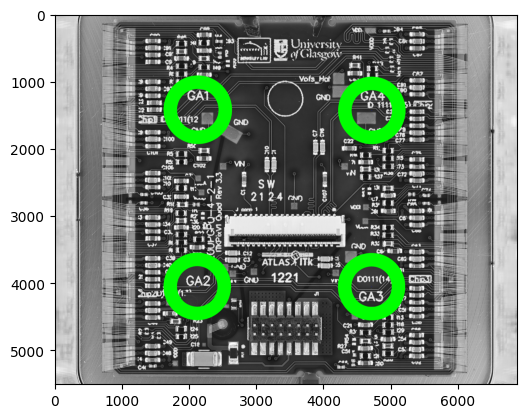

In [5]:
img = cv.imread(liste_cablees[5], cv.IMREAD_GRAYSCALE)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

#Slicing manuel : à changer si possible
mask = cv.medianBlur(img[500:-500,1000:-1000],25)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

#Fonction qui détecte les cercles.
circles = cv.HoughCircles(mask,cv.HOUGH_GRADIENT,1,minDist = 800,
            param1=50,param2=25,minRadius=400 ,maxRadius=420)

circles = np.uint16(np.around(circles))
for i in circles[0,:4]:
    # draw the outer circle
    cv.circle(cimg,(i[0]+1000,i[1]+500),i[2],(0,255,0),200)
    # draw the center of the circle
    cv.circle(cimg,(i[0]+1000,i[1]+500),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

In [17]:
img = cv.imread(liste_cablees[5])

lower_bound = np.array([0, 0, 0])
upper_bound = np.array([255,50,50])
imagemask = cv.inRange(img, lower_bound, upper_bound)
imagemask = cv.medianBlur(imagemask,9)

screen_res = 1280, 720
scale_width = screen_res[0] / img.shape[1]
scale_height = screen_res[1] / img.shape[0]
scale = min(scale_width, scale_height)
window_width = int(img.shape[1] * scale)
window_height = int(img.shape[0] * scale)

cv.namedWindow('title', cv.WINDOW_NORMAL)
cv.resizeWindow('title', window_width, window_height)
cv.imshow('title',imagemask)
cv.waitKey(0)
cv.destroyAllWindows()